# Airbnb

### About airbnb:
<ul> Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. 

### Today's Challenge
<li>To perform Exploratory data analysis
<li>Two variables that have the biggest importance are prices and availability - try to use some machine learning models and techniques to predict either one of these variables or both. 

### Loading Libraries
<li> I will import all the libraries used in the analysis in below cell block.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(style="ticks", color_codes=True)
import seaborn as sns; sns.set()
from datetime import date
from datetime import time
from datetime import datetime

In [144]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
border: 1px black solid !important;
color: black !important;
}

In [145]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Step 1: Identifying the business question: 
Analysis on Airbnb business in Netherlands to understand customers (host) and business scope.

### Step 2: About the dataset
<li>This dataset is obtained from http://insideairbnb.com/get-the-data.html that consists of information for different property
<li> The dataset has variables like room type, country, neighborhood, number of reviews etc. Lets load the dataset and start with analysis.

In [146]:
# Read csv file 
df = pd.read_csv('listings.csv', low_memory=False)
# Review first 5 rows
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


### Step 3: Preparing data for analysis

In [147]:
# Visualizing missing values
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',
               keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
xl_picture_url,20677,100.0
host_acceptance_rate,20677,100.0
medium_url,20677,100.0
neighbourhood_group_cleansed,20677,100.0
thumbnail_url,20677,100.0
...,...,...
maximum_nights,0,0.0
minimum_minimum_nights,0,0.0
maximum_minimum_nights,0,0.0
minimum_maximum_nights,0,0.0


#### Lets drop some columns to reduce noise in analysis

In [148]:
df.drop(['listing_url','scrape_id','last_scraped','summary','space', 'description','experiences_offered','neighborhood_overview','neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url','picture_url',
 'xl_picture_url','host_url','host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood','host_listings_count','host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street', 'calendar_updated','calendar_last_scraped','license',
 'jurisdiction_names','require_guest_profile_picture',
 'require_guest_phone_verification',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license', 'neighbourhood_group_cleansed','square_feet' ], axis = 1, inplace =  True)

### Step 4: Exploratory Data Analysis

### 1) what are room_type available ?



In [149]:
df.room_type.value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

#### Dropping Shared rooms because of their low volume and will not contribute more in analysis

In [150]:
df = df[df.room_type != 'Shared room']

In [151]:
df.room_type.value_counts()

Entire home/apt    16402
Private room        4194
Name: room_type, dtype: int64

### 2) Neighborhood popularity: It shows where the most popular neighborhood also it is saying near which neighborhood most of the rooms are situated
<ui> We can do analysis like :
    <li>the most preferred neighborhood or near which neighborhood most of the visitor coming
    <li> or whether having a particular type of neighborhood helps you get better rent or reviews or rating etc.

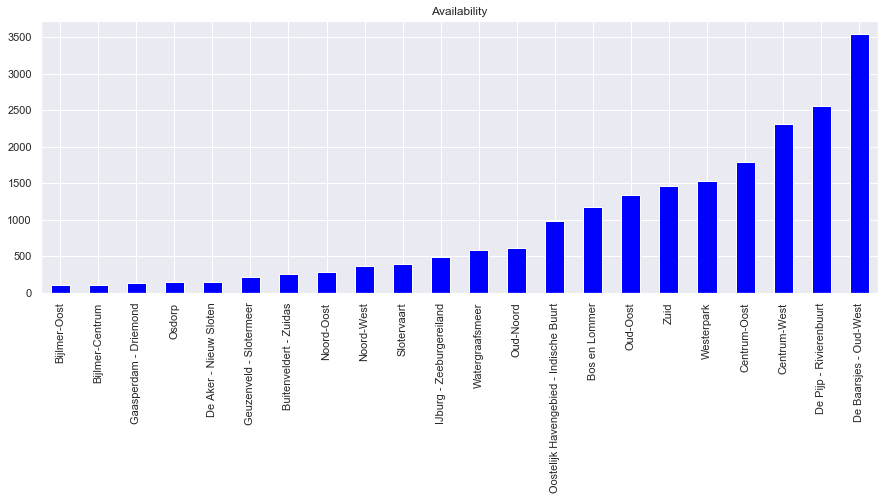

In [152]:
neighbourhood = df.neighbourhood.value_counts()
from collections import Counter
n = Counter(df['neighbourhood_cleansed'])
nh_df = pd.DataFrame.from_dict(n, orient='index').sort_values(by=0)

nh_df


ax = nh_df.plot(kind='bar', 
           color = 'blue', 
           figsize =(15,5), 
           title = 'Availability',
           legend = False)

ax

### Insight:
<li> From the neighbourhoods, 939.86 is the mean, thus lets consider only those neighborhoods above mean value. 
<li> Thus, from the above figure - 'Neighborhood listings' we get information that Oostelijk Havengebied - Indische Buurt	,Bos en Lommer, Oud-Oost, Zuid, Westerpark, Centrum-Oost, Centrum-West, De Pijp - Rivierenbuurt, De Baarsjes - Oud-West	are neighborhoods which make majority of our business.

### (3) Review for listings counts

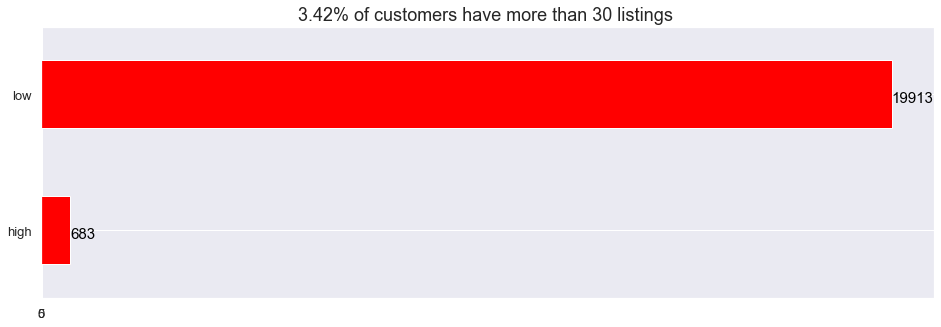

In [153]:
host_listings = df.groupby('host_total_listings_count')['host_id'].count().sort_values(ascending = False)
df['host_listings'] = np.where(df['host_total_listings_count']>=30, 'high', 'low')

ax = df['host_listings'].value_counts().plot(kind='barh', figsize=(16,5),

                                             color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("3.42% of customers have more than 30 listings ", fontsize=18)
ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()

### Insight:
<li> Major customers have less than 30 listings. There are very few customers who post more than 30 listings

### (4) Finding those listings where review score rating is high & low


In [154]:
df_high = df[df.review_scores_rating >= 70]
df_low = df[df.review_scores_rating < 70]
df_high.review_scores_rating.mean()

95.3441842000794

In [155]:
df_low.review_scores_rating.mean()

55.04430379746835

### (5) Lets find listings which had low ratings, and accomodates less than 3 people

In [156]:
# Converting price to float
df['price'] = df['price'].replace('[\$,%]', '', regex=True).astype(float)

In [157]:
df.price.median()

130.0

In [158]:
case1 = df_low[(df_low.accommodates <= 3)&(df_low.bedrooms == 2) & (df.price < 130)]
case1.id

C:\Users\sush1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10961    18576076
16311    27630147
19134    34630902
19522    35474859
20062    36504945
Name: id, dtype: int64

### Insight: 
<li>From above table, we could infer that there are <b><u>5 listings id</u> </b> with review rating less than 70, accomodates less that 3 people as well as have 2 bedrooms with price less than median price of $130

### (5.2) Lets see pricing trends based on the high rating score

In [159]:
df_high['price'] = df_high['price'].replace('[\$,%]', '', regex=True).astype(float)

C:\Users\sush1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


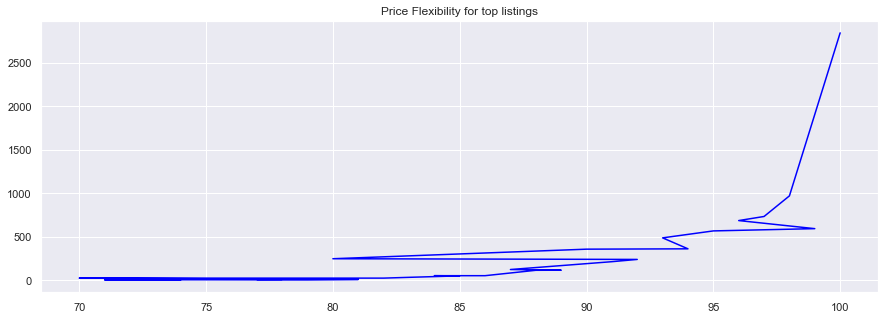

In [160]:
case2 = df_high[(df_high.price >= 130) & (df_high.price <=8915)].review_scores_rating.value_counts()
case2.plot(kind='line',  color = 'Blue', figsize =(15,5), title = 'Price Flexibility for top listings',legend = False)

### (6) On which price most of the properties are available?

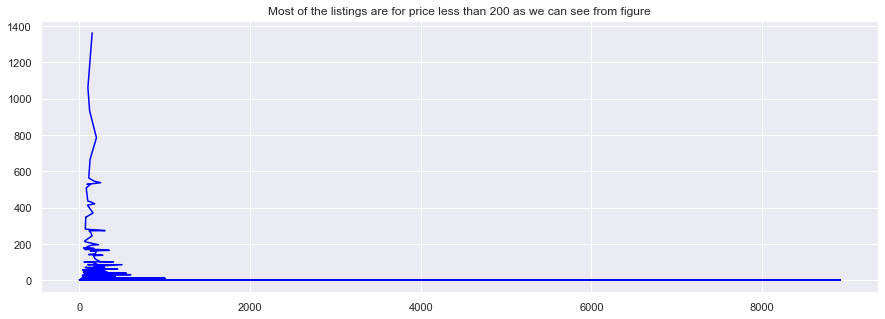

In [161]:
price = df.price.value_counts()
price.plot(kind='line',  color = 'Blue', figsize =(15,5), title = 'Most of the listings are for price less than 200 as we can see from figure',legend = False)

### Insight:
<li> Most of the listings are for <b><u> price less than 200</u></b> as we can see from figure

### (7) A year over year trend of customer acquisition
<ol> <li>Airbnb is a B2B business that helps its customers to host listings on its website.</li> 
    <li>It will be exciting to see how many customers(Host's) did they acquire year over year.</li>
</ol>

In [162]:
# Dropping values where bedrooms are equal to zero
df = df[df.bedrooms != 0]

# convert to datetime
df[["host_since", "first_review", "last_review"]] = df[["host_since", "first_review", "last_review"]].apply(pd.to_datetime)
df['year'] = df['host_since'].dt.year

In [163]:
host_year = df.groupby("year")['host_id'].nunique().reset_index()

Text(0.5, 1.0, 'Customers acquired year over year')

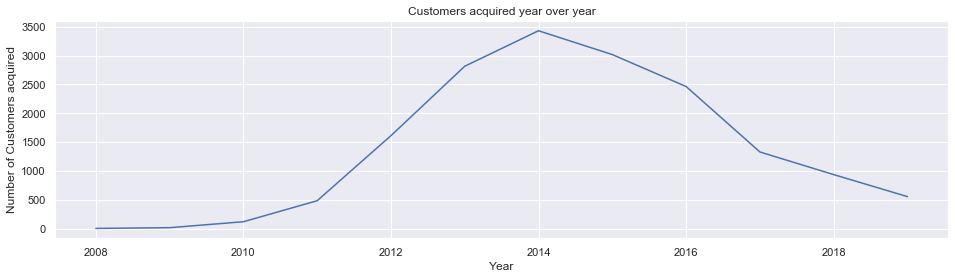

In [164]:
plt.figure(figsize=(16, 4))
sns.lineplot(x="year", y="host_id", data=host_year)
plt.ylabel('Number of Customers acquired')
plt.xlabel('Year')
plt.title('Customers acquired year over year')


#### Insights:
<li>Airbnb started in August 2008, thus it is fine if we can see low customers. <li>In 2019, the data available is only till August, this may also be a reason for a sharp decline in customers.<li>Year 2014 saw highest (host) customer acquisition.


### (8) Total number of Listings

In [165]:
total_listing =df.id.count()
print(f'Total number of Listings into consideration are {total_listing}')

Total number of Listings into consideration are 19444


### (8.1) Listings by Room type

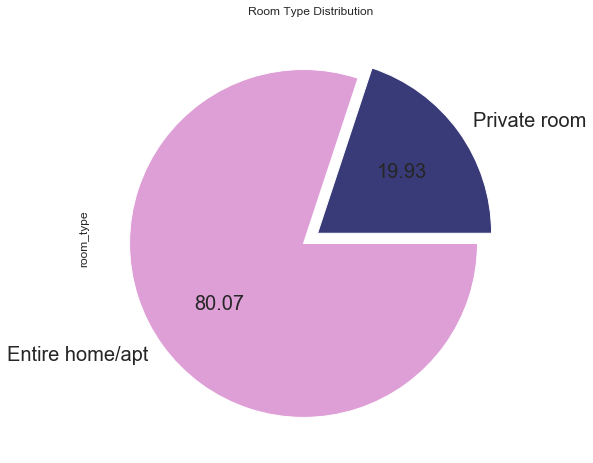

In [166]:
room = df.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
explode = (0.05, 0.05) 
room_df.plot.pie(y = 'room_type', 
                 colormap = 'tab20b', 
                 figsize=(8,8),
                 explode = explode,
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')


### Insights:
<li>Listings are posted by hosts also have a trend. Many of listings posted on Airbnb are for Entire home/ Apartment. 20% listings are posted for private room while we also see a small fraction of listings posted for shared room.

### Pivot table - mean price for different property types and room types

In [167]:
prop_room = df[['property_type', 'room_type', 'price']]

# first ten of the table
prop_room[0:10]

prop_room_group = prop_room.groupby(['property_type', 'room_type']).mean()

# resetting the index in order to turn the lists into a readable table
p = prop_room_group.reset_index()

# pivoting the table based on the 3 factors, in order.
p = p.pivot('property_type', 'room_type', 'price')

# replacing the NaN values with 0
p.fillna(0.00, inplace=True)

p


room_type,Entire home/apt,Private room
property_type,,
Aparthotel,230.659574,285.833333
Apartment,163.719530,99.362991
Barn,237.500000,0.000000
Bed and breakfast,584.333333,136.459519
Boat,227.846154,151.523364
Boutique hotel,149.000000,225.236842
Bungalow,82.500000,95.000000
Cabin,118.500000,86.666667
Camper/RV,87.333333,35.000000


### (9) What is the correlation between reviews and Price?

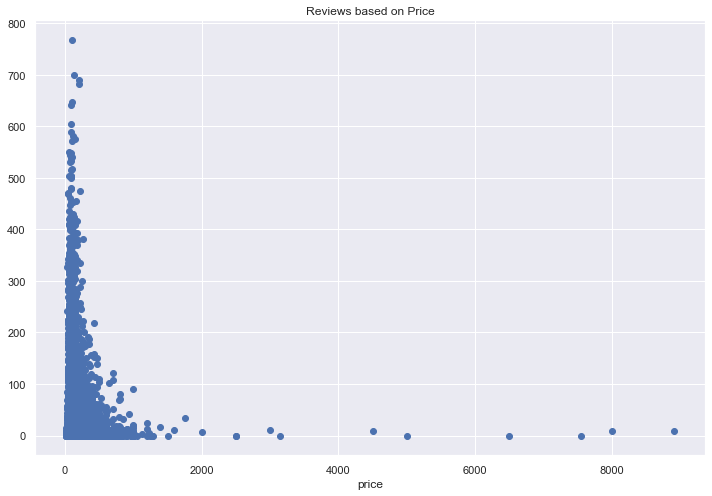

In [168]:
price_review = df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')


### Insight:
<li> From the above figure - Reviews based on Price, we can confidently say that low price listings have more reviews.

### (10) Cancellation Policy for listings 

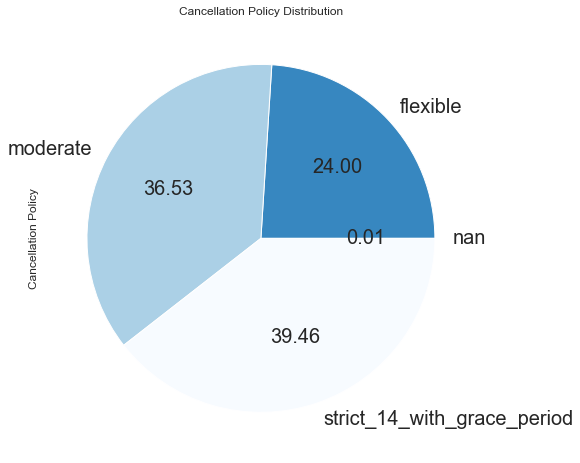

In [169]:
cancel = df.cancellation_policy
c = Counter(cancel)

# cleaning up small values
c.pop("super_strict_30", None)
c.pop("super_strict_60", None)
cancel_df = pd.DataFrame.from_dict(c, orient='index').sort_values(by=0)
cancel_df.columns = ['Cancellation Policy']
cancel_df.plot.pie(y = 'Cancellation Policy',
                   colormap = 'Blues_r',
                   figsize=(8,8), 
                   fontsize = 20, 
                   autopct = '%.2f',
                   legend = False,
                   title = "Cancellation Policy Distribution")

### (11) Are the listings posted available for atleast 2 months throughout the year?
To answer this question we do <b> Feature Engineering </b>

In [170]:
df.loc[df['availability_365'] <= 60, 'Availability'] = 'low_availability' 
df.loc[df['availability_365'] > 60, 'Availability'] = 'high_availability'

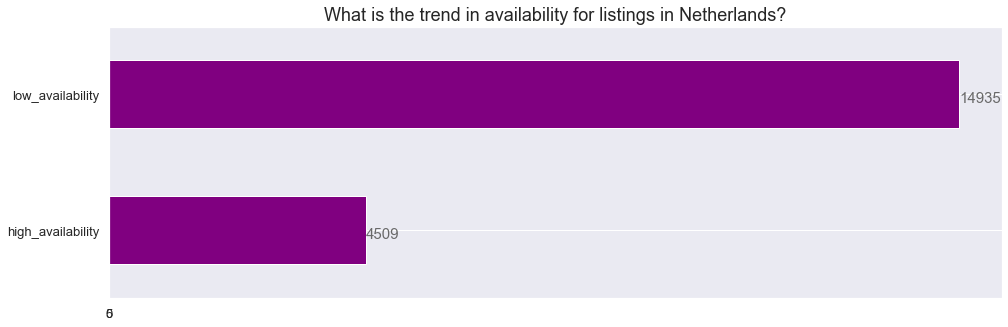

In [171]:
ax = df['Availability'].value_counts().plot(kind='barh', figsize=(16,5),
                                                 color="purple", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What is the trend in availability for listings in Netherlands?", fontsize=18)
ax.set_xticks([0, 5])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

### Note
After performing exploratory data analysis and surfacing 11 insights, i could conclude that price is the variable of interest and further investigation is needed and thus i will try to predict <u><b><i>Price</i></b></u>